# Programming for Data Analysis Project 2018

This jupyter notebook contains a project for the course Programming for Data Analysis. This project will attempt to model and synthesize data from a real-world phenomenon. It also investigates the types of variables involved and the relationships of the variables with each other.

The phenomenon chosen for this project is based on a research paper [1] to determine the short term risk of death in people following healthcare-related MRSA infection. The data represents the number of people who are infected with MRSA and grouped across gender, age, and mortality within 7 and 30 days post infection.  



## References

[1]  Lamagni TL, Potz N, Powell D, Pebody R, Wilson J, Duckworth G, Mortality in patients with meticillin-resistant   
     Staphylococcus aureus bacteraemia, England 2004-2005. Journal of Hospital Infection, 2010. 

[2]  Allard C, Carignan A, Bergevin M, et al. Secular changes in incidence and mortality associated with Staphylococcus 
     aureus bacteraemia in Quebec, Canada, 1991e2005. Clin Microbiol Infect 2008;14:421e428.

In [1]:
# import the packages to be used in the notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Initial calculations on the data from the research paper. 

In [3]:
# Data from the study
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
female_7day_mort = 750
male_7day_mort = 1075
female_30day_mort = 1345
male_30day_mort = 2105
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
femaleInfectionRate = infectedfemale / totalInfection
femaleInfectionRate

0.38062437506943675

In [8]:
totalmort = malemort + femalemort
totalmort

3450

#### There appears to be a higher risk of mortality in females within 7 days post infection. The study has no clear explanation for the phenomenon. This was also the case in a Canadian study [2].

In [9]:
ratio_male7daymort = male_7day_mort/infectedmale
ratio_male7daymort

0.19282511210762332

In [10]:
ratio_female7daymort = female_7day_mort/infectedfemale
ratio_female7daymort

0.21891418563922943

####  There is no significant increased risk of mortality in females than males within 30 days post infection in the study.

In [11]:
ratio_male30daymort = male_30day_mort/infectedmale
ratio_male30daymort

0.3775784753363229

In [12]:
ratio_female30daymort = female_30day_mort/infectedfemale
ratio_female30daymort

0.39258610624635143

#### Overall expected mortality ratios 

In [13]:
# The study finds lower mortality in men overall than women 
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [14]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

### DataFrame created from the data of the study showing the number of infections per month, and mortality within 7 and 30 days of infection.

In [15]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278)})

In [16]:
# Include in the DataFrame probable division of MRSA infection between gender

monthlymort['monthly_M_Infection'] = monthlymort['MRSA infection'] * maleInfectionRate
monthlymort['monthly_F_Infection'] = monthlymort['MRSA infection'] * femaleInfectionRate
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality,monthly_M_Infection,monthly_F_Infection
0,Jan,872,207,385,540.095545,331.904455
1,Feb,758,176,318,469.486724,288.513276
2,Mar,808,184,332,500.455505,307.544495
3,Apr,789,162,299,488.687368,300.312632
4,May,757,148,287,468.867348,288.132652
5,Jun,741,143,292,458.957338,282.042662
6,Jul,785,147,281,486.209866,298.790134
7,Aug,731,123,235,452.763582,278.236418
8,Sep,650,115,231,402.594156,247.405844
9,Oct,681,133,259,421.794801,259.205199


#### The line plot below shows a trend that follow a higher number of infection and mortality during winter and drop lower towards summer, then climb back up again heading into winter. 

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

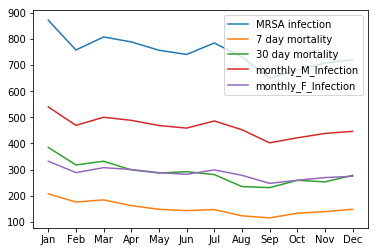

In [17]:
# line plot to visualize relationship of month to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


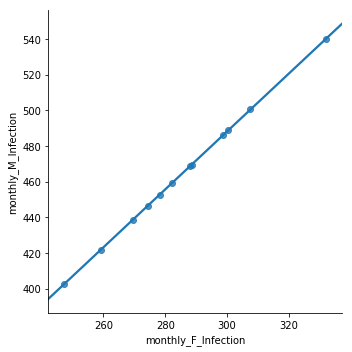

In [18]:
sns.lmplot(y="monthly_M_Infection", x="monthly_F_Infection", data=monthlymort)

In [19]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278), 'rate_of_infection': (28.129, 27.071, 26.065, 26.3, 24.419, 24.7, 25.323, 23.581, 21.667, 22.7, 23.6, 23.258)})

In [20]:
# rate_of_infection was divided individually for each month as each month had a different number of days.
# The 'calendar.monthrange(2004, 2)[1]' can be used but it only outputs one month at a time. 
monthlymort['7dayRate'] = monthlymort['7 day mortality'] / monthlymort['rate_of_infection']
monthlymort['30dayRate'] = monthlymort['30 day mortality'] / monthlymort['rate_of_infection']

In [21]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality,rate_of_infection,7dayRate,30dayRate
0,Jan,872,207,385,28.129,7.358953,13.686942
1,Feb,758,176,318,27.071,6.501422,11.746888
2,Mar,808,184,332,26.065,7.059275,12.737387
3,Apr,789,162,299,26.300,6.159696,11.368821
4,May,757,148,287,24.419,6.060854,11.753143
5,Jun,741,143,292,24.700,5.789474,11.821862
6,Jul,785,147,281,25.323,5.804999,11.096632
7,Aug,731,123,235,23.581,5.216064,9.965650
8,Sep,650,115,231,21.667,5.307611,10.661374
9,Oct,681,133,259,22.700,5.859031,11.409692


C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


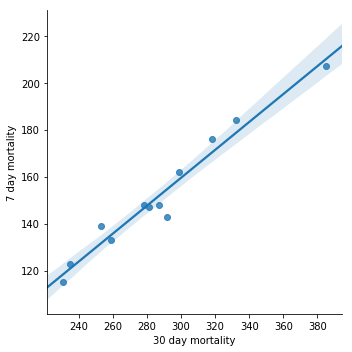

In [22]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


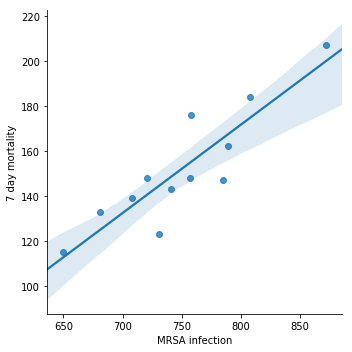

In [23]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


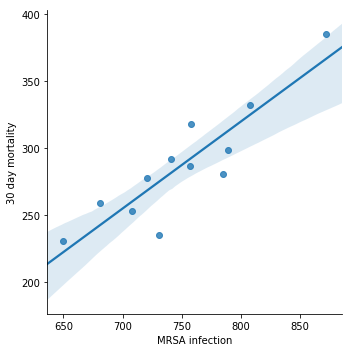

In [24]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [25]:
monthlymort.sum()

Month                JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                       9001
7 day mortality                                      1825
30 day mortality                                     3450
rate_of_infection                                 296.813
7dayRate                                          73.3706
30dayRate                                         138.922
dtype: object

In [26]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [27]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [28]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

[Text(0,0,'<15'),
 Text(0,0,'15-34'),
 Text(0,0,'35-44'),
 Text(0,0,'45-54'),
 Text(0,0,'55-64'),
 Text(0,0,'65-74'),
 Text(0,0,'75-84'),
 Text(0,0,'>85')]

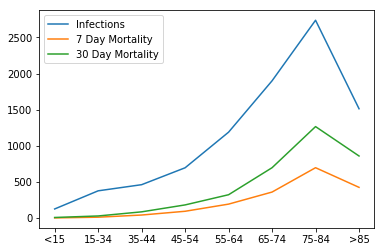

In [29]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [30]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [31]:
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [32]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [33]:
# Simulated data for Infections according to age per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [34]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,0,1.011448,1.277565,1.914243,3.269680,5.225701,7.492075,4.152131
1,1,1.017232,1.268266,1.911669,3.254267,5.205555,7.500103,4.147552
2,0,1.013535,1.259002,1.927825,3.267473,5.209563,7.508641,4.145378
3,0,1.045520,1.281321,1.922394,3.260175,5.220478,7.508868,4.145061
4,0,1.048794,1.273333,1.918782,3.251864,5.206655,7.491318,4.154643
5,0,1.021920,1.261388,1.916633,3.247286,5.229976,7.492547,4.142402
6,1,1.031891,1.254607,1.927166,3.260092,5.193886,7.519249,4.153407
7,1,1.028184,1.261553,1.889337,3.265700,5.202296,7.487441,4.131645
8,1,1.031284,1.270985,1.895839,3.259663,5.213722,7.502406,4.134437
9,1,1.053655,1.274762,1.903216,3.249397,5.203860,7.498653,4.147672


In [35]:
a.sum()

Sim<15        131.000000
Sim 15-34     375.963500
Sim 35-44     463.474751
Sim 45-54     697.168872
Sim 55-64    1189.813995
Sim 65-74    1901.524396
Sim 75-84    2737.657303
Sim >85      1514.877384
dtype: float64

#### The research paper stated that mortality rates are higher in women in all age groups but the data was not presented, nor was it broken down into a monthly format between male and female. A simulation of the number of infected persons grouped into  gender and considering the month of infection is detailed below. An easier option would have been to simulate by year but this would not account for the trend shown in infections by month. 

In [36]:
# Simulated data for daily infection of males and females for the year
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})


In [37]:
infection.sum()

maleInfection      5606
femaleInfection    3355
dtype: int64

In [38]:
infection.describe()

,maleInfection,femaleInfection
count,365.000000,365.000000
mean,15.358904,9.191781
std,2.516966,2.504159
min,7.000000,2.000000
25%,14.000000,8.000000
50%,15.000000,9.000000
75%,17.000000,11.000000
max,23.000000,17.000000
